# **18CS383: Machine Learning Lab 9** 

#Support Vector Machine

ROLL NUMBER:CB.SC.I5DAS18037            
NAME: Susindar.N

Download the dataset form[ here](https://drive.google.com/file/d/1aacJLFtm-4hFo16cyvzdpc2fky_5ZSgd/view?usp=sharing)

In [1]:

# Import the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
# Import the datasets
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [3]:
#Print the firt 5 rows
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [25]:
# Preprocess the dataset. Check for missing values, clean the dataset, see the data distribution among the classes
for i in dataset.columns:
    print("|len of dataset is 400 |\n",i,dataset[i].value_counts().sum())

print("*-------------------*")
print("  Dataset is clean")
print("*-------------------*")


|len of dataset is 400 |
 Age 400
|len of dataset is 400 |
 EstimatedSalary 400
|len of dataset is 400 |
 Purchased 400
*-------------------*
  Dataset is clean
*-------------------*


<AxesSubplot:ylabel='Frequency'>

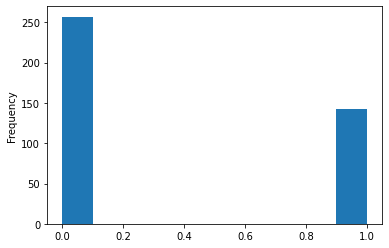

In [5]:
dataset.Purchased.plot(kind="hist")

In [24]:
dataset.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

<AxesSubplot:ylabel='Purchased'>

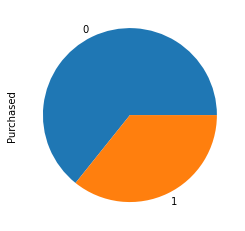

In [6]:
dataset.Purchased.value_counts().plot(kind="pie")

In [7]:
# Splitting the dataset into the Training set and Test set. Go for 75-25 split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [8]:
# Feature Scaling
# Explore StandardScaler from sklearn.preprocessing. Use fit function for feature scaling

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
# Fitting the classifier into the Training set
# Try linear kernel and non linear kernel analyse the results


LINEAR

In [11]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [12]:
# Predicting the test set results
y_pred = classifier.predict(X_test)


In [13]:
# Making the Confusion Matrix 

from sklearn.metrics import confusion_matrix, accuracy_score
cml = confusion_matrix(y_test, y_pred)
acc_l=accuracy_score(y_test, y_pred)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


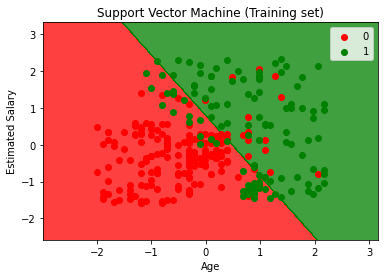

In [11]:
# Visualising the Training set results

from matplotlib.colors import ListedColormap
X_Set, Y_Set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Support Vector Machine (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


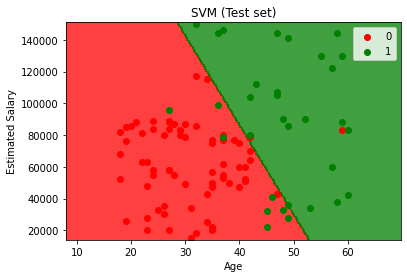

In [12]:

# Visualising the Test set results
#Refer the above code and do. 
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


NON LINEAR

In [14]:
classifier = SVC(kernel = 'sigmoid', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [15]:
cms = confusion_matrix(y_test, y_pred)
acc_s=accuracy_score(y_test, y_pred)

In [18]:
classifier = SVC(kernel = 'poly', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [19]:
cmp = confusion_matrix(y_test, y_pred)
acc_p=accuracy_score(y_test, y_pred)

In [20]:
classifier = SVC(kernel = 'rbf',C=1, random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [21]:
cmr = confusion_matrix(y_test, y_pred)
acc_r=accuracy_score(y_test, y_pred)
acc_r

0.93

#**Analysis using Linear Kernel and Non-linear Kernel**
**Give your inferences after analysing the results.**

In [22]:
print("*-------------------------------------*")
print("            Accuracy Scores\n")
print("   Linear      ",acc_l)
print("   RBF         ",acc_r)
print("   Polynomial  ",acc_p)
print("   Sigmoid     ",acc_s)

*-------------------------------------*
            Accuracy Scores

   Linear       0.9
   RBF          0.93
   Polynomial   0.86
   Sigmoid      0.74


INFERENCE

We can notice that Radial Basis Function fits well for this Social network Data.
The Data is mostly linearly seperable, but it is pointed out that Non-linear kernel(Rbf) acts as a better classifier.Therefore the data is Non linearly seperable.Hence we go for RBF

Visualizing the best Classifier- SVC-RBF

Test-Rbf

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


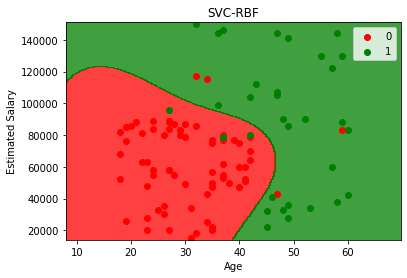

In [23]:
 from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVC-RBF')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()